In [1]:
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,6)})

# Distributions

## Uniform Distribution

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

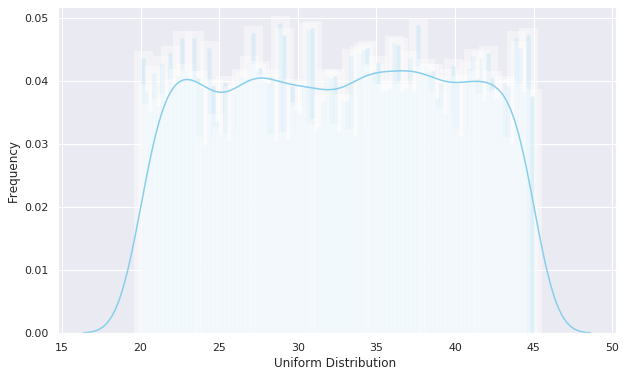

In [3]:
from scipy.stats import uniform

number = 10000 #number of random variables (size)
start = 20 #start location (loc)
width = 25 

uniform_data = uniform.rvs(size=number, loc=start, scale=width)

axis = sns.distplot(uniform_data, bins=100, kde=True, color='skyblue', hist_kws={"linewidth": 15})
axis.set(xlabel='Uniform Distribution ', ylabel='Frequency')


## Normal Distribution

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

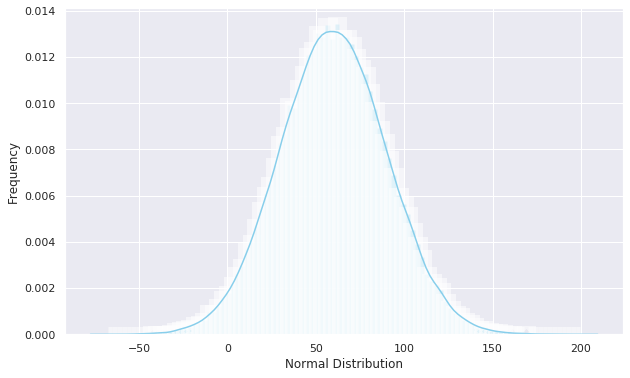

In [4]:
from scipy.stats import norm

# loc = mean of dist, scale = stddev of mean
normal_data = norm.rvs(size=90000, loc=60, scale=30)
axis = sns.distplot(normal_data, bins=100, kde=True, color='skyblue',
hist_kws={"linewidth": 15,'alpha':0.568})
axis.set(xlabel='Normal Distribution', ylabel='Frequency')

In [5]:
df = pd.read_csv('StockX-Data-Contest-2019-3.csv')

In [6]:
yzy = df[df['Brand'] == ' Yeezy']
yzy_p_nd = yzy.copy()
sp = [float(x[1:].replace(',', '')) for x in list(yzy['Sale Price'])]
yzy_p_nd['Sale Price'] = sp
rp = [float(x[1:].replace(',', '')) for x in list(yzy['Retail Price'])]
yzy_p_nd['Retail Price'] = rp

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

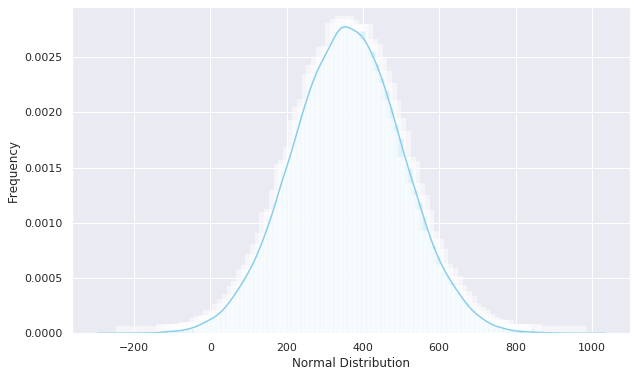

In [7]:
prices = list(yzy_p_nd['Sale Price'])

mean = np.mean(prices)
std = np.std(prices)

normal_data = norm.rvs(size=len(prices), loc=mean, scale=std)
axis = sns.distplot(normal_data, bins=100, kde=True, color='skyblue',
hist_kws={"linewidth": 15,'alpha':0.568})
axis.set(xlabel='Normal Distribution', ylabel='Frequency')

## Exponential Distribution

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

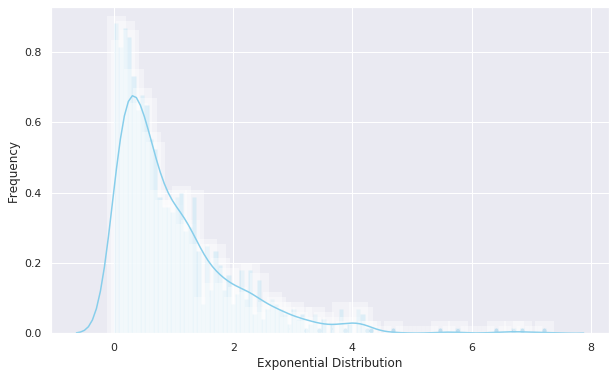

In [8]:
from scipy.stats import expon

expon_data = expon.rvs(scale=1,loc=0,size=1000)

axis = sns.distplot(expon_data, kde=True, bins=100, color='skyblue', hist_kws={"linewidth": 15})
axis.set(xlabel='Exponential Distribution', ylabel='Frequency')

## Binomial Distribution 

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

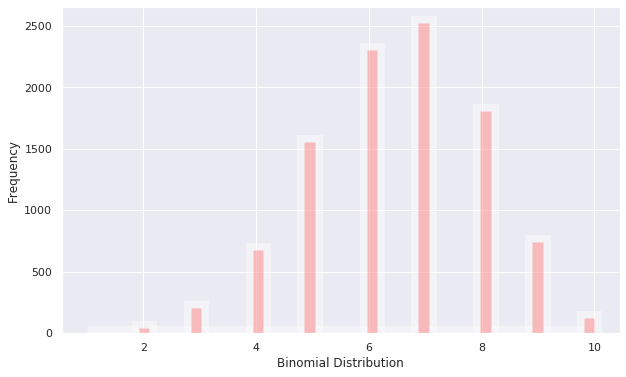

In [9]:
from scipy.stats import binom

#p = success probability, n = number of trials 
binomial_data = binom.rvs(n=10, p=0.65,size=10000)

axis = sns.distplot(binomial_data, kde=False, color='red',hist_kws={"linewidth": 15})
axis.set(xlabel='Binomial Distribution', ylabel='Frequency')

# Measures of central tendency

## Mean, Median and Mode

In [10]:
mean = np.mean(prices)
print('numpy mean:', mean)
mean = yzy_p_nd['Sale Price'].mean()
print('pandas mean:', mean)

numpy mean: 360.03255175854326
pandas mean: 360.03255175854326


In [11]:
median = np.median(prices)
print('numpy median:', median)
median = yzy_p_nd['Sale Price'].median()
print('pandas median:', median)

numpy median: 316.0
pandas median: 316.0


In [12]:
from scipy.stats import mode
mode = mode(yzy_p_nd['Sneaker Name'])
print('scipy mode:', mode)
mode = yzy_p_nd['Sneaker Name'].mode()
print('pandas median:', mode)

scipy mode: ModeResult(mode=array(['adidas-Yeezy-Boost-350-V2-Butter'], dtype=object), count=array([11423]))
pandas median: 0    adidas-Yeezy-Boost-350-V2-Butter
dtype: object


In [13]:
#Describe shows all descriptive statics for all continuous variables in dataset

yzy_p_nd.describe()

,Sale Price,Retail Price,Shoe Size
count,72162.000000,72162.000000,72162.000000
mean,360.032552,219.873895,9.238332
std,143.732138,1.583109,2.382799
min,186.000000,200.000000,3.500000
25%,268.000000,220.000000,8.000000
50%,316.000000,220.000000,9.500000
75%,399.000000,220.000000,11.000000
max,2300.000000,220.000000,17.000000


# Measures of dispertion

# Std Deviation

In [14]:
std_dev = yzy_p_nd.std()
print(std_dev)

std_dev_sp = yzy_p_nd['Sale Price'].std()
print('one column std:', std_dev_sp)

Sale Price      143.732138
Retail Price      1.583109
Shoe Size         2.382799
dtype: float64
one column std: 143.73213759687482


In [15]:
variance = yzy_p_nd.var() #std_dev^2
print(variance)

var_sp = yzy_p_nd['Sale Price'].var()
print(var_sp)
print(std_dev_sp**2)

Sale Price      20658.927378
Retail Price        2.506235
Shoe Size           5.677732
dtype: float64
20658.927378166954
20658.927378166958


# Skeweness
Negative -> mean < mode

Positive -> mean > mode

Symmetric -> mean = mode = median

In [16]:
yzy_p_nd.skew()

Sale Price       2.730773
Retail Price   -12.474398
Shoe Size       -0.340235
dtype: float64

# Kurtosis
3 types:
- Mesokurtic -> around 0 kurtosis (very similar to normal dist)
- Leptokurtic -> fat tail, positive kurtosis higher than 3
- Platykurtic -> thin tail, negative kurtosis

Lepto and platy are indicators to outliers

In [17]:
kurtosis = yzy_p_nd.kurtosis()

In [18]:
kurtosis

Sale Price       12.257132
Retail Price    153.614874
Shoe Size        -0.448164
dtype: float64

# Percentiles

In [19]:
percentile = np.percentile(prices, 50,)

In [20]:
percentile #MEDIAN! 50th percentile == median!

316.0

In [21]:
percentile = np.percentile(prices, 80,)

In [22]:
percentile

420.0

# Quartiles

In [23]:
prices = np.sort(prices)
Q1 = np.percentile(prices, 25)
print(Q1)

Q2 = np.percentile(prices, 50)
print(Q2)

Q3 = np.percentile(prices, 75)
print(Q3)

268.0
316.0
399.0


In [24]:
IQR = Q3 - Q1
IQR

131.0

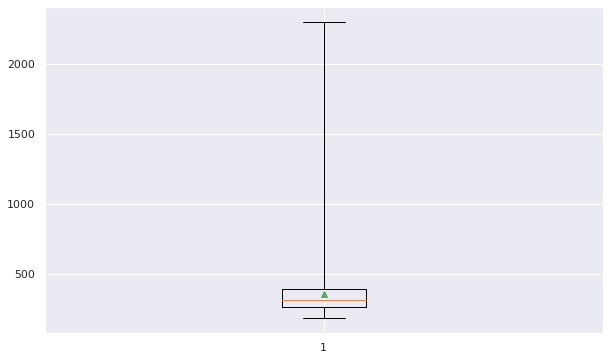

In [25]:
plt.boxplot(prices, showmeans=True, whis=99)
plt.show()

In [26]:
ofw = df[df['Brand'] != ' Yeezy']

ofw_p_nd = ofw.copy()
sp = [float(x[1:].replace(',', '')) for x in list(ofw['Sale Price'])]
ofw_p_nd['Sale Price'] = sp
rp = [float(x[1:].replace(',', '')) for x in list(ofw['Retail Price'])]
ofw_p_nd['Retail Price'] = rp

prices2 = list(ofw_p_nd['Sale Price'])

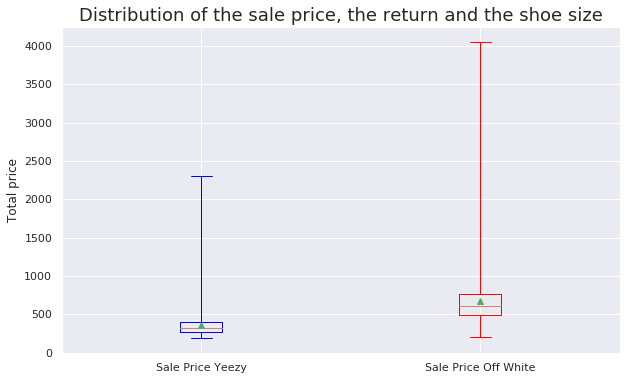

In [36]:
sps = [prices, prices2]


box = plt.boxplot(sps, showmeans=True, whis=99)

plt.setp(box['boxes'][0], color='blue')
plt.setp(box['caps'][0], color='blue')
plt.setp(box['caps'][1], color='blue')
plt.setp(box['whiskers'][0], color='blue')
plt.setp(box['whiskers'][1], color='blue')

plt.setp(box['boxes'][1], color='red')
plt.setp(box['caps'][2], color='red')
plt.setp(box['caps'][3], color='red')
plt.setp(box['whiskers'][2], color='red')
plt.setp(box['whiskers'][3], color='red')


plt.grid(True, axis='y')
plt.title('Distribution of the sale price, the return and the shoe size', fontsize=18)
plt.ylabel('Total price')
plt.xticks([1,2], ['Sale Price Yeezy','Sale Price Off White'])
plt.show()